### Declaration of Library


In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from scipy.spatial import distance_matrix
from sklearn.cluster import AgglomerativeClustering
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn import manifold, datasets
import matplotlib.cm as cm
%matplotlib inline


### Upload dataset

In [17]:
## Code ambil melalui file pribadi
from google.colab import files
uploaded = files.upload()

Saving lokis.csv to lokis (1).csv


In [18]:
## Load dataset
## Load Dataset ulang nama file tourism

tourism = pd.read_csv('lokis (1).csv')
tourism

,no,name,category,city,address,place_id,rating,price,open hours,latitude,longitude,time_minutes,maps,user_id,url,deskripsi
0,1,Tribeca Park,park,Jakarta,"Letjen S. Parman No.28, RT.12/RW.6, Tj. Duren ...",ChIJOQcPe1_2aS4RodErUdz2cfc,4.7,0,24 hours,-6.177251,106.790470,17,https://www.google.com/maps/search/?api=1&quer...,1,https://firebasestorage.googleapis.com/v0/b/lo...,Tribeca Park merupakan area terbuka ramai yang...
1,2,Museum Perangko Indonesia,museum,Jakarta,"MWW2+8PC, Taman Mini Indonesia Indah, Jalan Ta...",ChIJPaQs81DtaS4RGVitRjnxIZQ,4.5,5000,08.00 am - 04.00 pm,-6.304184,106.901773,43,https://www.google.com/maps/search/?api=1&quer...,2,https://firebasestorage.googleapis.com/v0/b/lo...,Kompleks museum filateli yang mengeksplorasi s...
2,3,Museum Layang-layang Indonesia,museum,Jakarta,"Jl. H. Kamang No.38, RT.8/RW.10, Pd. Labu, Kec...",ChIJjzzUACDuaS4Rc_mZHqCBRbA,4.5,15000,09.00 am - 04.00 pm,-6.307985,106.790585,39,https://www.google.com/maps/search/?api=1&quer...,3,https://firebasestorage.googleapis.com/v0/b/lo...,Museum Layang-Layang Indonesia adalah sebuah m...
3,4,Hutan Kota Srengseng,tourist_attraction,Jakarta,"Jl. H. Kelik, RT.8/RW.6, Srengseng, Kec. Kemba...",ChIJE7YGNy_3aS4RrCeV3DO5qhE,4.4,4000,07.00 am - 05.00 pm,-6.210694,106.764395,27,https://www.google.com/maps/search/?api=1&quer...,4,https://firebasestorage.googleapis.com/v0/b/lo...,Taman alam perkotaan yang luas dengan jalan se...
4,5,Wisata Kota Tua Jakarta,tourist_attraction,Jakarta,"Kawasan Kota Tua, Taman Fatahillah No.1, RT.7/...",ChIJ7RcAlCrsaS4RM4GToNQSzt8,4.6,5000,08.00 am - 09.00 pm,-6.135069,106.813680,26,https://www.google.com/maps/search/?api=1&quer...,5,https://firebasestorage.googleapis.com/v0/b/lo...,"Kota tua Jakarta, Kota Tua berpusat di Alun-Al..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,243,Taman Jajan Cikunir,tourist_attraction,Bekasi,"Jl. Cikunir Raya No.88, RT.002/RW.003, Jaka Mu...",ChIJb7Zc6b6NaS4RX1FmWU1NNZ0,4.5,5000,09.00 am - 23.00 pm,-6.272262,106.962166,52,https://www.google.com/maps/search/?api=1&quer...,242,https://firebasestorage.googleapis.com/v0/b/lo...,Taman Jajan Cikunir merupakan sebuah tempat ma...
235,244,Al-Barkah Bekasi Great Mosque,mosque,Bekasi,"Masjid Al - Barkah, Jl. Veteran No.46, RT.003/...",ChIJe6y_wSWMaS4RXpaow-yK2_A,4.8,0,24 hours,-6.240764,106.999540,49,https://www.google.com/maps/search/?api=1&quer...,243,https://firebasestorage.googleapis.com/v0/b/lo...,"Masjid yang dibangun pada era Hindia-Belanda, ..."
236,246,Permainan anak alamanda regency,tourist_attraction,Bekasi,"Jl. Alamanda Regency Raya, Karangsatria, Kec. ...",ChIJlVul64iPaS4RQZXD-Z0RcZ0,5.0,20000,07.30 am - 11.00 pm,-6.226594,107.045138,66,https://www.google.com/maps/search/?api=1&quer...,245,https://firebasestorage.googleapis.com/v0/b/lo...,Arena permainan anak-anak yang menyenangkan.
237,247,Jatusumbi,tourist_attraction,Bekasi,"Kp Payangan RT 006, RT.012/RW.008, Jatisari, K...",ChIJ78OzxrGTaS4R1QaWjFQ-fOY,4.5,0,07.00 am - 06.00 pm,-6.351069,106.949539,75,https://www.google.com/maps/search/?api=1&quer...,246,https://firebasestorage.googleapis.com/v0/b/lo...,Destinasi wisata air.


In [19]:
tourism.mean()

<ipython-input-19-05e132176d34>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  tourism.mean()


no                123.096234
rating              4.480335
price           18887.029289
latitude           -6.333426
longitude         106.813257
time_minutes       69.468619
user_id           122.958159
dtype: float64

In [20]:
tourism.fillna(tourism.mean(),inplace=True)

<ipython-input-20-f0bd9bad6851>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  tourism.fillna(tourism.mean(),inplace=True)


In [21]:
tourism.isna().sum()

no              0
name            0
category        0
city            0
address         0
place_id        0
rating          0
price           0
open hours      0
latitude        0
longitude       0
time_minutes    0
maps            0
user_id         0
url             0
deskripsi       0
dtype: int64

### Jakarta

In [22]:
jakarta_city = tourism[tourism['city']=='Jakarta']


In [23]:
#tourism = pd.get_dummies(jakarta_city, columns=["Category"])
tourism_jakarta = pd.get_dummies(jakarta_city, columns=["city"])


In [24]:
tourism

,no,name,category,city,address,place_id,rating,price,open hours,latitude,longitude,time_minutes,maps,user_id,url,deskripsi
0,1,Tribeca Park,park,Jakarta,"Letjen S. Parman No.28, RT.12/RW.6, Tj. Duren ...",ChIJOQcPe1_2aS4RodErUdz2cfc,4.7,0,24 hours,-6.177251,106.790470,17,https://www.google.com/maps/search/?api=1&quer...,1,https://firebasestorage.googleapis.com/v0/b/lo...,Tribeca Park merupakan area terbuka ramai yang...
1,2,Museum Perangko Indonesia,museum,Jakarta,"MWW2+8PC, Taman Mini Indonesia Indah, Jalan Ta...",ChIJPaQs81DtaS4RGVitRjnxIZQ,4.5,5000,08.00 am - 04.00 pm,-6.304184,106.901773,43,https://www.google.com/maps/search/?api=1&quer...,2,https://firebasestorage.googleapis.com/v0/b/lo...,Kompleks museum filateli yang mengeksplorasi s...
2,3,Museum Layang-layang Indonesia,museum,Jakarta,"Jl. H. Kamang No.38, RT.8/RW.10, Pd. Labu, Kec...",ChIJjzzUACDuaS4Rc_mZHqCBRbA,4.5,15000,09.00 am - 04.00 pm,-6.307985,106.790585,39,https://www.google.com/maps/search/?api=1&quer...,3,https://firebasestorage.googleapis.com/v0/b/lo...,Museum Layang-Layang Indonesia adalah sebuah m...
3,4,Hutan Kota Srengseng,tourist_attraction,Jakarta,"Jl. H. Kelik, RT.8/RW.6, Srengseng, Kec. Kemba...",ChIJE7YGNy_3aS4RrCeV3DO5qhE,4.4,4000,07.00 am - 05.00 pm,-6.210694,106.764395,27,https://www.google.com/maps/search/?api=1&quer...,4,https://firebasestorage.googleapis.com/v0/b/lo...,Taman alam perkotaan yang luas dengan jalan se...
4,5,Wisata Kota Tua Jakarta,tourist_attraction,Jakarta,"Kawasan Kota Tua, Taman Fatahillah No.1, RT.7/...",ChIJ7RcAlCrsaS4RM4GToNQSzt8,4.6,5000,08.00 am - 09.00 pm,-6.135069,106.813680,26,https://www.google.com/maps/search/?api=1&quer...,5,https://firebasestorage.googleapis.com/v0/b/lo...,"Kota tua Jakarta, Kota Tua berpusat di Alun-Al..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,243,Taman Jajan Cikunir,tourist_attraction,Bekasi,"Jl. Cikunir Raya No.88, RT.002/RW.003, Jaka Mu...",ChIJb7Zc6b6NaS4RX1FmWU1NNZ0,4.5,5000,09.00 am - 23.00 pm,-6.272262,106.962166,52,https://www.google.com/maps/search/?api=1&quer...,242,https://firebasestorage.googleapis.com/v0/b/lo...,Taman Jajan Cikunir merupakan sebuah tempat ma...
235,244,Al-Barkah Bekasi Great Mosque,mosque,Bekasi,"Masjid Al - Barkah, Jl. Veteran No.46, RT.003/...",ChIJe6y_wSWMaS4RXpaow-yK2_A,4.8,0,24 hours,-6.240764,106.999540,49,https://www.google.com/maps/search/?api=1&quer...,243,https://firebasestorage.googleapis.com/v0/b/lo...,"Masjid yang dibangun pada era Hindia-Belanda, ..."
236,246,Permainan anak alamanda regency,tourist_attraction,Bekasi,"Jl. Alamanda Regency Raya, Karangsatria, Kec. ...",ChIJlVul64iPaS4RQZXD-Z0RcZ0,5.0,20000,07.30 am - 11.00 pm,-6.226594,107.045138,66,https://www.google.com/maps/search/?api=1&quer...,245,https://firebasestorage.googleapis.com/v0/b/lo...,Arena permainan anak-anak yang menyenangkan.
237,247,Jatusumbi,tourist_attraction,Bekasi,"Kp Payangan RT 006, RT.012/RW.008, Jatisari, K...",ChIJ78OzxrGTaS4R1QaWjFQ-fOY,4.5,0,07.00 am - 06.00 pm,-6.351069,106.949539,75,https://www.google.com/maps/search/?api=1&quer...,246,https://firebasestorage.googleapis.com/v0/b/lo...,Destinasi wisata air.


###select the feature which gonna use to build clustering

In [25]:
featureset_jakarta = tourism_jakarta[['price', 'rating']]


In [26]:
## cek matriks
from sklearn.preprocessing import MinMaxScaler
x = featureset_jakarta.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]


array([[0.   , 0.7  ],
       [0.02 , 0.5  ],
       [0.06 , 0.5  ],
       [0.016, 0.4  ],
       [0.02 , 0.6  ]])

In [ ]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx)
print(dist_matrix)

#### using kmeans with sklear

In [27]:
agglom = KMeans(n_clusters = 10)
agglom.fit(feature_mtx)
agglom.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([9, 7, 7, 0, 3, 5, 7, 7, 4, 8, 7, 9, 3, 3, 6, 1, 9, 9, 7, 7, 6, 7,
       7, 1, 7, 7, 3, 0, 7, 4, 4, 7, 7, 7, 9, 8, 0, 3, 5, 1, 8, 9, 8, 0,
       0, 7, 5, 2, 6, 8, 5], dtype=int32)

In [ ]:
## code error
#pd.set_option("max_columns", None) #Showing only two columns
#pd.set_option("max_rows", None)

In [28]:
tourism_jakarta['cluster_'] = agglom.labels_
tourism_jakarta

,no,name,category,address,place_id,rating,price,open hours,latitude,longitude,time_minutes,maps,user_id,url,deskripsi,city_Jakarta,cluster_
0,1,Tribeca Park,park,"Letjen S. Parman No.28, RT.12/RW.6, Tj. Duren ...",ChIJOQcPe1_2aS4RodErUdz2cfc,4.7,0,24 hours,-6.177251,106.790470,17,https://www.google.com/maps/search/?api=1&quer...,1,https://firebasestorage.googleapis.com/v0/b/lo...,Tribeca Park merupakan area terbuka ramai yang...,1,9
1,2,Museum Perangko Indonesia,museum,"MWW2+8PC, Taman Mini Indonesia Indah, Jalan Ta...",ChIJPaQs81DtaS4RGVitRjnxIZQ,4.5,5000,08.00 am - 04.00 pm,-6.304184,106.901773,43,https://www.google.com/maps/search/?api=1&quer...,2,https://firebasestorage.googleapis.com/v0/b/lo...,Kompleks museum filateli yang mengeksplorasi s...,1,7
2,3,Museum Layang-layang Indonesia,museum,"Jl. H. Kamang No.38, RT.8/RW.10, Pd. Labu, Kec...",ChIJjzzUACDuaS4Rc_mZHqCBRbA,4.5,15000,09.00 am - 04.00 pm,-6.307985,106.790585,39,https://www.google.com/maps/search/?api=1&quer...,3,https://firebasestorage.googleapis.com/v0/b/lo...,Museum Layang-Layang Indonesia adalah sebuah m...,1,7
3,4,Hutan Kota Srengseng,tourist_attraction,"Jl. H. Kelik, RT.8/RW.6, Srengseng, Kec. Kemba...",ChIJE7YGNy_3aS4RrCeV3DO5qhE,4.4,4000,07.00 am - 05.00 pm,-6.210694,106.764395,27,https://www.google.com/maps/search/?api=1&quer...,4,https://firebasestorage.googleapis.com/v0/b/lo...,Taman alam perkotaan yang luas dengan jalan se...,1,0
4,5,Wisata Kota Tua Jakarta,tourist_attraction,"Kawasan Kota Tua, Taman Fatahillah No.1, RT.7/...",ChIJ7RcAlCrsaS4RM4GToNQSzt8,4.6,5000,08.00 am - 09.00 pm,-6.135069,106.813680,26,https://www.google.com/maps/search/?api=1&quer...,5,https://firebasestorage.googleapis.com/v0/b/lo...,"Kota tua Jakarta, Kota Tua berpusat di Alun-Al...",1,3
5,6,Museum Dunia Serangga,museum,"Jl. Hankam Raya No.39, RT.7/RW.2, Ceger, Kec. ...",ChIJq20OQ1vtaS4R6DNaT8eHd3Q,4.4,35000,08.00 am - 05.00 pm,-6.305779,106.895434,47,https://www.google.com/maps/search/?api=1&quer...,6,https://firebasestorage.googleapis.com/v0/b/lo...,Diperkirakan sekitar 16% jumlah jenis serangga...,1,5
6,7,Hutan Kota Kembangan Utara,park,"Jl. Hutan Kota No.11, RT.11/RW.5, Kedoya Utara...",ChIJby43F6P3aS4RlaJEAUa5WCg,4.5,0,07.00 am - 09.00 pm,-6.170279,106.751059,32,https://www.google.com/maps/search/?api=1&quer...,7,https://firebasestorage.googleapis.com/v0/b/lo...,Hutan Kota Kembangan Utara tampak rimbun dan t...,1,7
7,8,Old Town River,tourist_attraction,"Kota Tua, Jl. Kali Besar Tim. No.21, RT.7/RW.2...",ChIJ96ScBDUdai4RX9GhTDqAThY,4.5,0,24 hours,-6.134847,106.811581,26,https://www.google.com/maps/search/?api=1&quer...,8,https://firebasestorage.googleapis.com/v0/b/lo...,"pusatnya di Alun-Alun Fatahillah, sebuah alun-...",1,7
8,9,Museum Komodo Jagat Satwa Nusantara,museum,"MWW2+CCC, Jl. Taman Mini Indonesia Indah, RW.2...",ChIJR1W7hVDtaS4RDq02-3vC544,5.0,40000,09.00 am - 05.00 pm,-6.303947,106.901011,47,https://www.google.com/maps/search/?api=1&quer...,9,https://firebasestorage.googleapis.com/v0/b/lo...,Jagat Satwa Nusantara adalah konsep pengembang...,1,4
9,10,Kampung Main Cipulir,tourist_attraction,"Jl. Masjid Cidodol No.26, RT.5/RW.12, Grogol S...",ChIJW7irRGjxaS4RFgz6GOYSU0s,4.5,30000,08.00 am - 04.00 pm,-6.232258,106.766798,34,https://www.google.com/maps/search/?api=1&quer...,10,https://firebasestorage.googleapis.com/v0/b/lo...,wisata ini menyediakan berbagai macam kegiatan...,1,8


In [29]:

#import matplotlib.cm as cm
#n_clusters = max(agglom.labels_)+1
#colors = cm.rainbow(np.linspace(0, 1, n_clusters))
#cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
#plt.figure(figsize=(16,14))

#for color, label in zip(colors, cluster_labels):
#    subset = tourism[tourism.cluster_ == label]
#    for i in subset.index:
#            plt.text(subset.Price[i], subset.Time_Minutes[i],str(subset['model'][i]), rotation=25)
#    plt.scatter(subset.Price, subset.Time_Minutes, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
#plt.legend()
#plt.title('Clusters')
#plt.xlabel('horsepow')
#plt.ylabel('mpg')


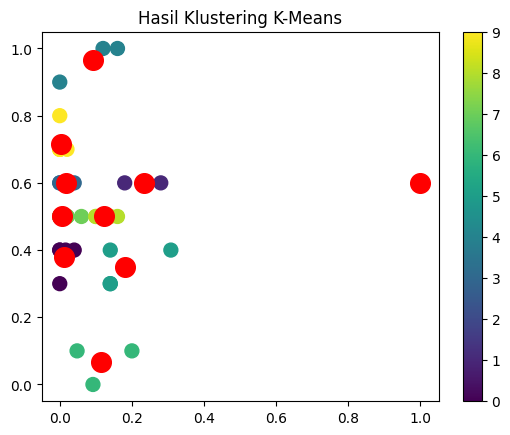

In [30]:
output = plt.scatter(feature_mtx[:,0], feature_mtx[:,1], s = 100, c = tourism_jakarta.cluster_, marker = "o", alpha = 1, )
centers = agglom.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

clustering diatas masih menggunakan variabel (price/harga tempat wisata dan rating) *bukan* time_minutes/ jarak tempuh

### Bogor

In [31]:
bogor_city = tourism[tourism['city']=='Bogor']


In [32]:
#tourism = pd.get_dummies(jakarta_city, columns=["Category"])
tourism_bogor = pd.get_dummies(bogor_city, columns=["city"])


### select the feature which gonna use to build clustering


In [33]:
tourism_bogor

,no,name,category,address,place_id,rating,price,open hours,latitude,longitude,time_minutes,maps,user_id,url,deskripsi,city_Bogor
51,52,Kujang Monument,tourist_attraction,"Jalan Raya Pajajaran No.1A, Baranangsiang, Bog...",ChIJAQAAAOHFaS4R_OqyTgPgYBQ,4.7,0,24 hours,-6.601442,106.805074,141,https://www.google.com/maps/search/?api=1&quer...,52,https://firebasestorage.googleapis.com/v0/b/lo...,Monumen Kujang ialah sebuah tugu 25 meter yang...,1
52,53,Bogor Botanical Gardens,tourist_attraction,"Jl. Ir. H. Juanda No.13, Paledang, Kecamatan B...",ChIJu3qmEsTFaS4R5X6jRWs88nU,4.7,30000,07.00 am - 04.00 pm,-6.597629,106.799570,135,https://www.google.com/maps/search/?api=1&quer...,53,https://firebasestorage.googleapis.com/v0/b/lo...,Kebun Raya Bogor adalah sebuah kebun raya yang...,1
53,54,Ah Poong Sentul,tourist_attraction,"CRHW+VC3, Cipambuan, Babakan Madang, Bogor Reg...",ChIJYXu-DuzGaS4RfSMINpXsvAI,4.3,0,10.00 am - 09.00 pm,-6.570352,106.846053,125,https://www.google.com/maps/search/?api=1&quer...,54,https://firebasestorage.googleapis.com/v0/b/lo...,Ruang tepi sungai dengan halaman berumput dan ...,1
54,56,Mexico Garden,tourist_attraction,"Jl. Otto Iskandardinata No.13, RT.04/RW.02, Pa...",ChIJM3LVAMTFaS4RFmbOu-3QVRM,4.6,17000,08.00 am - 05.00 pm,-6.602243,106.800344,136,https://www.google.com/maps/search/?api=1&quer...,56,https://firebasestorage.googleapis.com/v0/b/lo...,Bagian di Kebun Raya Bogor yang menampilkan ta...,1
55,57,Devoyage Bogor,tourist_attraction,"Jl. Bogor Nirwana Residence Jl. Indigo Raya, M...",ChIJ-7wYfl3PaS4RCGtWG3s34tY,4.1,98000,09.00 am - 06.00 pm,-6.637089,106.795362,143,https://www.google.com/maps/search/?api=1&quer...,57,https://firebasestorage.googleapis.com/v0/b/lo...,Taman hiburan bertema desa Eropa yang menampil...,1
56,58,Situ Tamansari,tourist_attraction,"Jl. Tamansari No.529, Tamansari, Kec. Tamansar...",ChIJb7olN7zPaS4RSMZTA0Zy-yc,4.4,3500,09.00 am - 05.00 pm,-6.653531,106.754014,157,https://www.google.com/maps/search/?api=1&quer...,58,https://firebasestorage.googleapis.com/v0/b/lo...,Setu Tamansari merupakan setu yang hampir semp...,1
57,59,The Jungle Water Adventure,amusement_park,"Perumahan, Jl. Bogor Nirwana Residence Jalan B...",ChIJ8xmm613PaS4RBLnoMfATWkg,4.5,90000,09.00 am - 05.00 pm,-6.634479,106.794922,145,https://www.google.com/maps/search/?api=1&quer...,59,https://firebasestorage.googleapis.com/v0/b/lo...,"Taman hiburan yang menampilkan seluncuran air,...",1
58,60,Kuntum Farmfield,tourist_attraction,"Komplek, Jl. Teras Hijau Residence Jl. Raya Ta...",ChIJr5HZvK_IaS4RYyxR-GQHnqo,4.5,65000,08.00 am - 06.00 pm,-6.641625,106.839718,149,https://www.google.com/maps/search/?api=1&quer...,60,https://firebasestorage.googleapis.com/v0/b/lo...,Peternakan rekreasi dengan kesempatan untuk me...,1
59,62,Leuwi Orok,tourist_attraction,"Jl. Lamtoro No.7, RT.02/RW.04, Kedunghalang, K...",ChIJyeXyBH7FaS4R26TjReZ-I2U,4.7,10000,24 hours,-6.558577,106.809307,122,https://www.google.com/maps/search/?api=1&quer...,62,https://firebasestorage.googleapis.com/v0/b/lo...,Leuwi Orok merupakan wisata alam baru di Bogor...,1
60,63,Bukit Panorama,tourist_attraction,"9R64+25F, RT.02/RW.08, Pamoyanan, Bogor Selata...",ChIJ0T9lZkXPaS4Ri86H-vZOqkY,4.5,10000,24 hours,-6.639852,106.804955,176,https://www.google.com/maps/search/?api=1&quer...,63,https://firebasestorage.googleapis.com/v0/b/lo...,Destinasi wisata alam di kawasan Gunung Salak.,1


In [34]:
featureset_bogor = tourism_bogor[['price', 'time_minutes']]

In [35]:
from sklearn.preprocessing import MinMaxScaler
x = featureset_bogor.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]


array([[0.        , 0.66346154],
       [0.18181818, 0.60576923],
       [0.        , 0.50961538],
       [0.1030303 , 0.61538462],
       [0.59393939, 0.68269231]])

### using kmeans with sklear

In [36]:
agglom = KMeans(n_clusters = 10)
agglom.fit(feature_mtx)
agglom.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([7, 2, 0, 2, 1, 7, 1, 9, 0, 8, 6, 0, 6, 0, 3, 5, 7, 0, 0, 2, 2, 0,
       0, 7, 2, 0, 7, 2, 9, 0, 0, 4, 4, 0, 0, 0, 2, 1, 2, 0, 7, 4, 0, 5,
       9, 6], dtype=int32)

In [37]:
tourism_bogor['cluster_'] = agglom.labels_
tourism_bogor

,no,name,category,address,place_id,rating,price,open hours,latitude,longitude,time_minutes,maps,user_id,url,deskripsi,city_Bogor,cluster_
51,52,Kujang Monument,tourist_attraction,"Jalan Raya Pajajaran No.1A, Baranangsiang, Bog...",ChIJAQAAAOHFaS4R_OqyTgPgYBQ,4.7,0,24 hours,-6.601442,106.805074,141,https://www.google.com/maps/search/?api=1&quer...,52,https://firebasestorage.googleapis.com/v0/b/lo...,Monumen Kujang ialah sebuah tugu 25 meter yang...,1,7
52,53,Bogor Botanical Gardens,tourist_attraction,"Jl. Ir. H. Juanda No.13, Paledang, Kecamatan B...",ChIJu3qmEsTFaS4R5X6jRWs88nU,4.7,30000,07.00 am - 04.00 pm,-6.597629,106.799570,135,https://www.google.com/maps/search/?api=1&quer...,53,https://firebasestorage.googleapis.com/v0/b/lo...,Kebun Raya Bogor adalah sebuah kebun raya yang...,1,2
53,54,Ah Poong Sentul,tourist_attraction,"CRHW+VC3, Cipambuan, Babakan Madang, Bogor Reg...",ChIJYXu-DuzGaS4RfSMINpXsvAI,4.3,0,10.00 am - 09.00 pm,-6.570352,106.846053,125,https://www.google.com/maps/search/?api=1&quer...,54,https://firebasestorage.googleapis.com/v0/b/lo...,Ruang tepi sungai dengan halaman berumput dan ...,1,0
54,56,Mexico Garden,tourist_attraction,"Jl. Otto Iskandardinata No.13, RT.04/RW.02, Pa...",ChIJM3LVAMTFaS4RFmbOu-3QVRM,4.6,17000,08.00 am - 05.00 pm,-6.602243,106.800344,136,https://www.google.com/maps/search/?api=1&quer...,56,https://firebasestorage.googleapis.com/v0/b/lo...,Bagian di Kebun Raya Bogor yang menampilkan ta...,1,2
55,57,Devoyage Bogor,tourist_attraction,"Jl. Bogor Nirwana Residence Jl. Indigo Raya, M...",ChIJ-7wYfl3PaS4RCGtWG3s34tY,4.1,98000,09.00 am - 06.00 pm,-6.637089,106.795362,143,https://www.google.com/maps/search/?api=1&quer...,57,https://firebasestorage.googleapis.com/v0/b/lo...,Taman hiburan bertema desa Eropa yang menampil...,1,1
56,58,Situ Tamansari,tourist_attraction,"Jl. Tamansari No.529, Tamansari, Kec. Tamansar...",ChIJb7olN7zPaS4RSMZTA0Zy-yc,4.4,3500,09.00 am - 05.00 pm,-6.653531,106.754014,157,https://www.google.com/maps/search/?api=1&quer...,58,https://firebasestorage.googleapis.com/v0/b/lo...,Setu Tamansari merupakan setu yang hampir semp...,1,7
57,59,The Jungle Water Adventure,amusement_park,"Perumahan, Jl. Bogor Nirwana Residence Jalan B...",ChIJ8xmm613PaS4RBLnoMfATWkg,4.5,90000,09.00 am - 05.00 pm,-6.634479,106.794922,145,https://www.google.com/maps/search/?api=1&quer...,59,https://firebasestorage.googleapis.com/v0/b/lo...,"Taman hiburan yang menampilkan seluncuran air,...",1,1
58,60,Kuntum Farmfield,tourist_attraction,"Komplek, Jl. Teras Hijau Residence Jl. Raya Ta...",ChIJr5HZvK_IaS4RYyxR-GQHnqo,4.5,65000,08.00 am - 06.00 pm,-6.641625,106.839718,149,https://www.google.com/maps/search/?api=1&quer...,60,https://firebasestorage.googleapis.com/v0/b/lo...,Peternakan rekreasi dengan kesempatan untuk me...,1,9
59,62,Leuwi Orok,tourist_attraction,"Jl. Lamtoro No.7, RT.02/RW.04, Kedunghalang, K...",ChIJyeXyBH7FaS4R26TjReZ-I2U,4.7,10000,24 hours,-6.558577,106.809307,122,https://www.google.com/maps/search/?api=1&quer...,62,https://firebasestorage.googleapis.com/v0/b/lo...,Leuwi Orok merupakan wisata alam baru di Bogor...,1,0
60,63,Bukit Panorama,tourist_attraction,"9R64+25F, RT.02/RW.08, Pamoyanan, Bogor Selata...",ChIJ0T9lZkXPaS4Ri86H-vZOqkY,4.5,10000,24 hours,-6.639852,106.804955,176,https://www.google.com/maps/search/?api=1&quer...,63,https://firebasestorage.googleapis.com/v0/b/lo...,Destinasi wisata alam di kawasan Gunung Salak.,1,8


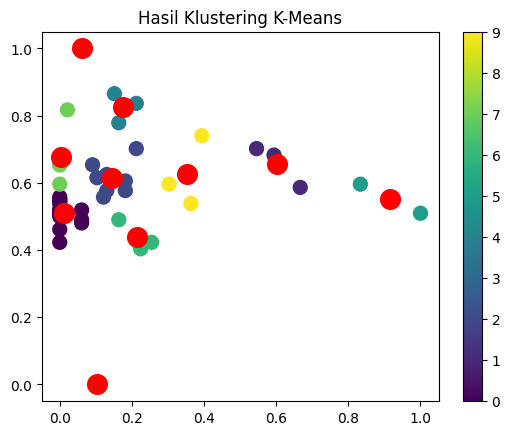

In [38]:
output = plt.scatter(feature_mtx[:,0], feature_mtx[:,1], s = 100, c = tourism_bogor.cluster_, marker = "o", alpha = 1, )
centers = agglom.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

### Depok

In [39]:
depok_city = tourism[tourism['city']=='Depok']

#tourism = pd.get_dummies(jakarta_city, columns=["Category"])
tourism_depok = pd.get_dummies(depok_city, columns=["city"])

tourism_depok

,no,name,category,address,place_id,rating,price,open hours,latitude,longitude,time_minutes,maps,user_id,url,deskripsi,city_Depok
97,100,D'Kandang Depok,tourist_attraction,"Jl. Penarikan No.RT 01 / 02, Pasir Putih, Kec....",ChIJ66kabaXpaS4RFX0LDLpU5aY,4.3,20000,08.00 am - 05.00 pm,-6.415876,106.784568,77,https://www.google.com/maps/search/?api=1&quer...,100,https://firebasestorage.googleapis.com/v0/b/lo...,Pusat rekreasi dengan hewan ternak & pameran t...,1
98,101,Situ Rawa Besar Depok,tourist_attraction,"Jl. Pakis No.106, Depok Jaya, Kec. Pancoran Ma...",ChIJ08ANi1fpaS4Rz0-QBWQC9z4,4.5,0,08.00 am - 06.00 pm,-6.391874,106.816016,67,https://www.google.com/maps/search/?api=1&quer...,101,https://firebasestorage.googleapis.com/v0/b/lo...,Situ Rawa Besar atau Situ Lio merupakan salah ...,1
99,102,Lembah Mawar Depok,park,"Jl. Mawar Raya, Depok Jaya, Kec. Pancoran Mas,...",ChIJf7Q9dFrpaS4R3tBwjmnFbzY,4.5,0,06.00 am - 06.00 pm,-6.392249,106.810061,107,https://www.google.com/maps/search/?api=1&quer...,102,https://firebasestorage.googleapis.com/v0/b/lo...,Salah satu kawasan hijau di kawasan Depok jaya...,1
100,103,Taman Wisata Pasir Putih,amusement_park,"Jl. Garuda Raya No.1, RT.01/RW.07, Pasir Putih...",ChIJ33QwtaTpaS4Ry_F-np_4lKY,4.3,15000,09.00 am - 05.00 pm,-6.433063,106.787352,72,https://www.google.com/maps/search/?api=1&quer...,103,https://firebasestorage.googleapis.com/v0/b/lo...,Taman rekreasi air keluarga dengan kolam renan...,1
101,104,Taman wisata permata buana,tourist_attraction,"Jl. H. Hanafi No.33, Serua, Kec. Bojongsari, K...",ChIJYfd_bUnvaS4RSOmItPzSY-g,4.6,100000,06.00 am - 09.00 pm,-6.377435,106.743365,66,https://www.google.com/maps/search/?api=1&quer...,104,https://firebasestorage.googleapis.com/v0/b/lo...,Tempat wisata di Depok yang menawarkan konsep ...,1
102,105,UI Park,park,"JRWH+74C, Kampus UI, RW.3, Srengseng Sawah, Ke...",ChIJ17KQmiTsaS4RajHfopAS3oE,4.7,0,24 hours,-6.354316,106.827761,51,https://www.google.com/maps/search/?api=1&quer...,105,https://firebasestorage.googleapis.com/v0/b/lo...,Taman universitas luas dengan jalur rindang & ...,1
103,106,Pondok Zidane,amusement_park,"Jalan Kekupu Blok, Blok Porek 1, Bedahan, Kec....",ChIJrTvU_a3paS4RYvSPxYAdQ0U,4.3,110000,08.00 am - 04.00 pm,-6.433419,106.776169,79,https://www.google.com/maps/search/?api=1&quer...,106,https://firebasestorage.googleapis.com/v0/b/lo...,Pusat aktivitas luar ruangan yang alami dengan...,1
104,107,Danau Kenanga,park,"Jl. Prof. DR. Mahar Mardjono, Pondok Cina, Kec...",ChIJvYVjmBDsaS4RZupdrhOPC7Y,4.7,4000,08.00 am - 06.00 pm,-6.366754,106.830212,56,https://www.google.com/maps/search/?api=1&quer...,107,https://firebasestorage.googleapis.com/v0/b/lo...,Danau ini berada di kawasan kampus Universitas...,1
105,108,Taman Herbal Insani Depok,park,"Jl. Kp. Kandang Duren Seribu, Duren Seribu, Ke...",ChIJ7UyNsKPpaS4RjOyOTzMGzUY,4.4,30000,08.00 am - 05.00 pm,-6.432990,106.741314,75,https://www.google.com/maps/search/?api=1&quer...,108,https://firebasestorage.googleapis.com/v0/b/lo...,"Taman bertema herbal dengan kolam renang, akti...",1
106,109,Taman Pemuda Pratama,amusement_park,"Tanah Baru, Beji, Depok City, West Java 16426,...",ChIJhfOad7ruaS4RJrUCGqCCc-Q,4.5,0,08.00 am - 05.00 pm,-6.370957,106.802259,66,https://www.google.com/maps/search/?api=1&quer...,109,https://firebasestorage.googleapis.com/v0/b/lo...,"Tmepat wisata berenang, wahana ATV dan paintba...",1


### select the feature which gonna use to build clustering

In [40]:
featureset_depok = tourism_depok[['price', 'time_minutes']]

In [41]:
from sklearn.preprocessing import MinMaxScaler
x = featureset_depok.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.1       , 0.46428571],
       [0.        , 0.28571429],
       [0.        , 1.        ],
       [0.075     , 0.375     ],
       [0.5       , 0.26785714]])

In [42]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx)
print(dist_matrix)

[[0.         0.20466498 0.5449677  ... 0.16071429 0.05       0.452727  ]
 [0.20466498 0.         0.71428571 ... 0.10158188 0.18543936 0.38928571]
 [0.5449677  0.71428571 0.         ... 0.70357143 0.53804256 0.98380379]
 ...
 [0.16071429 0.10158188 0.70357143 ... 0.         0.16831245 0.32328827]
 [0.05       0.18543936 0.53804256 ... 0.16831245 0.         0.47954326]
 [0.452727   0.38928571 0.98380379 ... 0.32328827 0.47954326 0.        ]]


### using kmeans with sklear

In [43]:
agglom = KMeans(n_clusters = 10)
agglom.fit(feature_mtx)
agglom.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 3, 6, 2, 5, 2, 5, 1, 0, 0, 0, 7, 5, 7, 8, 1, 6, 0, 1, 8, 7,
       6, 5, 8, 1, 5, 1, 5, 0, 6, 6, 6, 0, 6, 7, 6, 1, 7, 7, 8, 5, 7, 4,
       6, 7, 9], dtype=int32)

In [44]:
tourism_depok['cluster_'] = agglom.labels_
tourism_depok

,no,name,category,address,place_id,rating,price,open hours,latitude,longitude,time_minutes,maps,user_id,url,deskripsi,city_Depok,cluster_
97,100,D'Kandang Depok,tourist_attraction,"Jl. Penarikan No.RT 01 / 02, Pasir Putih, Kec....",ChIJ66kabaXpaS4RFX0LDLpU5aY,4.3,20000,08.00 am - 05.00 pm,-6.415876,106.784568,77,https://www.google.com/maps/search/?api=1&quer...,100,https://firebasestorage.googleapis.com/v0/b/lo...,Pusat rekreasi dengan hewan ternak & pameran t...,1,1
98,101,Situ Rawa Besar Depok,tourist_attraction,"Jl. Pakis No.106, Depok Jaya, Kec. Pancoran Ma...",ChIJ08ANi1fpaS4Rz0-QBWQC9z4,4.5,0,08.00 am - 06.00 pm,-6.391874,106.816016,67,https://www.google.com/maps/search/?api=1&quer...,101,https://firebasestorage.googleapis.com/v0/b/lo...,Situ Rawa Besar atau Situ Lio merupakan salah ...,1,0
99,102,Lembah Mawar Depok,park,"Jl. Mawar Raya, Depok Jaya, Kec. Pancoran Mas,...",ChIJf7Q9dFrpaS4R3tBwjmnFbzY,4.5,0,06.00 am - 06.00 pm,-6.392249,106.810061,107,https://www.google.com/maps/search/?api=1&quer...,102,https://firebasestorage.googleapis.com/v0/b/lo...,Salah satu kawasan hijau di kawasan Depok jaya...,1,3
100,103,Taman Wisata Pasir Putih,amusement_park,"Jl. Garuda Raya No.1, RT.01/RW.07, Pasir Putih...",ChIJ33QwtaTpaS4Ry_F-np_4lKY,4.3,15000,09.00 am - 05.00 pm,-6.433063,106.787352,72,https://www.google.com/maps/search/?api=1&quer...,103,https://firebasestorage.googleapis.com/v0/b/lo...,Taman rekreasi air keluarga dengan kolam renan...,1,6
101,104,Taman wisata permata buana,tourist_attraction,"Jl. H. Hanafi No.33, Serua, Kec. Bojongsari, K...",ChIJYfd_bUnvaS4RSOmItPzSY-g,4.6,100000,06.00 am - 09.00 pm,-6.377435,106.743365,66,https://www.google.com/maps/search/?api=1&quer...,104,https://firebasestorage.googleapis.com/v0/b/lo...,Tempat wisata di Depok yang menawarkan konsep ...,1,2
102,105,UI Park,park,"JRWH+74C, Kampus UI, RW.3, Srengseng Sawah, Ke...",ChIJ17KQmiTsaS4RajHfopAS3oE,4.7,0,24 hours,-6.354316,106.827761,51,https://www.google.com/maps/search/?api=1&quer...,105,https://firebasestorage.googleapis.com/v0/b/lo...,Taman universitas luas dengan jalur rindang & ...,1,5
103,106,Pondok Zidane,amusement_park,"Jalan Kekupu Blok, Blok Porek 1, Bedahan, Kec....",ChIJrTvU_a3paS4RYvSPxYAdQ0U,4.3,110000,08.00 am - 04.00 pm,-6.433419,106.776169,79,https://www.google.com/maps/search/?api=1&quer...,106,https://firebasestorage.googleapis.com/v0/b/lo...,Pusat aktivitas luar ruangan yang alami dengan...,1,2
104,107,Danau Kenanga,park,"Jl. Prof. DR. Mahar Mardjono, Pondok Cina, Kec...",ChIJvYVjmBDsaS4RZupdrhOPC7Y,4.7,4000,08.00 am - 06.00 pm,-6.366754,106.830212,56,https://www.google.com/maps/search/?api=1&quer...,107,https://firebasestorage.googleapis.com/v0/b/lo...,Danau ini berada di kawasan kampus Universitas...,1,5
105,108,Taman Herbal Insani Depok,park,"Jl. Kp. Kandang Duren Seribu, Duren Seribu, Ke...",ChIJ7UyNsKPpaS4RjOyOTzMGzUY,4.4,30000,08.00 am - 05.00 pm,-6.432990,106.741314,75,https://www.google.com/maps/search/?api=1&quer...,108,https://firebasestorage.googleapis.com/v0/b/lo...,"Taman bertema herbal dengan kolam renang, akti...",1,1
106,109,Taman Pemuda Pratama,amusement_park,"Tanah Baru, Beji, Depok City, West Java 16426,...",ChIJhfOad7ruaS4RJrUCGqCCc-Q,4.5,0,08.00 am - 05.00 pm,-6.370957,106.802259,66,https://www.google.com/maps/search/?api=1&quer...,109,https://firebasestorage.googleapis.com/v0/b/lo...,"Tmepat wisata berenang, wahana ATV dan paintba...",1,0


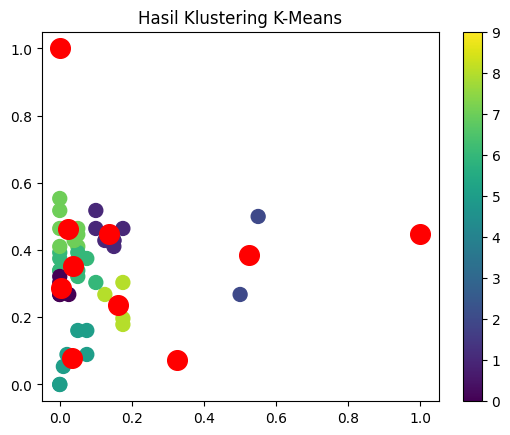

In [45]:
output = plt.scatter(feature_mtx[:,0], feature_mtx[:,1], s = 100, c = tourism_depok.cluster_, marker = "o", alpha = 1, )
centers = agglom.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

### Tanggerang

In [46]:
tangerang_city = tourism[tourism['city']=='Tangerang']

#tourism = pd.get_dummies(jakarta_city, columns=["Category"])
tourism_tangerang= pd.get_dummies(tangerang_city, columns=["city"])

tourism_tangerang

,no,name,category,address,place_id,rating,price,open hours,latitude,longitude,time_minutes,maps,user_id,url,deskripsi,city_Tangerang
144,150,Cisadane Walk,park,"RJHH+29Q, Sepanjang, Jl. Benteng Jaya, RT.004/...",ChIJwSpXqjL_aS4R6oJ9R_MxAXQ,4.6,0,24 hours,-6.172402,106.628482,50,https://www.google.com/maps/search/?api=1&quer...,150,https://firebasestorage.googleapis.com/v0/b/lo...,Kawasan pejalan kaki tepi laut dengan papan wa...,1
145,151,Taman Pintu Air,park,"Daan Mogot Rd No.60, RT.001/RW.005, Sukarasa, ...",ChIJV_cMIcz4aS4RRSeiogbi47Y,4.4,0,24 hours,-6.168520,106.634491,47,https://www.google.com/maps/search/?api=1&quer...,151,https://firebasestorage.googleapis.com/v0/b/lo...,Taman Pintu Air merupakan tempat wisata rekrea...,1
146,152,Kampung Bekelir,tourist_attraction,"RJ6M+RPP, Jl. Perintis Kemerdekaan, RT.001/RW....",ChIJqZKkjvj5aS4RzchmpwHCyWc,4.7,0,24 hours,-6.187923,106.634313,52,https://www.google.com/maps/search/?api=1&quer...,152,https://firebasestorage.googleapis.com/v0/b/lo...,sebanyak 300 rumah bercat warna-warni dan terd...,1
147,153,Taman Potret,park,"RJ3J+VVW, RT.001/RW.005, Babakan, Tangerang, T...",ChIJpe-XqzP5aS4RW20zJ7Ekvq4,4.5,0,24 hours,-6.195261,106.632193,54,https://www.google.com/maps/search/?api=1&quer...,153,https://firebasestorage.googleapis.com/v0/b/lo...,Taman kecil dengan area bermain anak-anak sert...,1
148,154,Taman Bambu (Bamboo Park),park,"RJ4J+9W2, RT.007/RW.003, Babakan, Tangerang, T...",ChIJo0VM9DL5aS4ROra6P9weulY,4.5,0,07.00 am - 10.00 pm,-6.194113,106.632264,51,https://www.google.com/maps/search/?api=1&quer...,154,https://firebasestorage.googleapis.com/v0/b/lo...,Taman indah dengan jalan setapak tak beraspal ...,1
149,155,Scientia Square Park,park,"Jl. Scientia Boulevard, Curug Sangereng, Kec. ...",ChIJI5JkHmX8aS4R2VwoZ-_yljs,4.5,95000,08.00 am - 10.00 pm,-6.257042,106.615500,68,https://www.google.com/maps/search/?api=1&quer...,155,https://firebasestorage.googleapis.com/v0/b/lo...,"Taman kota dengan jalur joging, dinding panjat...",1
150,156,Taman Elektrik,park,"RJHR+X2Q, Jl. Satria - Sudirman, RT.002/RW.001...",ChIJJaUmm8_4aS4RBTAlBnBQCl8,4.8,0,24 hours,-6.170043,106.640117,44,https://www.google.com/maps/search/?api=1&quer...,156,https://firebasestorage.googleapis.com/v0/b/lo...,Taman Elektrik ini luasnya kurang lebih 3.000 ...,1
151,157,Eco Village Caldera,tourist_attraction,"J276+67X, Ragemanunggal, Tambelang, Bekasi Reg...",ChIJw1lTW6aWaS4Raf7rnfAbnCM,4.0,20000,07.00 am - 10.00 pm,-6.386882,107.010738,88,https://www.google.com/maps/search/?api=1&quer...,157,https://firebasestorage.googleapis.com/v0/b/lo...,Caldera Eco Village berkonsep sederhana dengan...,1
152,158,Kampung Markisa,tourist_attraction,"Jl. Ks. Tubun No.17, RT.001/RW.003, Ps. Baru, ...",ChIJPf3lGZj5aS4RdPqFe3pXf3E,4.6,5000,24 hours,-6.168862,106.626254,52,https://www.google.com/maps/search/?api=1&quer...,158,https://firebasestorage.googleapis.com/v0/b/lo...,Kampung Markisa ini menawarkan destinasi wisat...,1
153,159,Situ Batusari,tourist_attraction,"Jl. Darussalam Utara II No.161-173, RT.003/RW....",ChIJ5-ChDU_5aS4RZkVKmB9VV_k,4.6,5000,24 hours,-6.151108,106.656373,47,https://www.google.com/maps/search/?api=1&quer...,159,https://firebasestorage.googleapis.com/v0/b/lo...,Situ Batusari kini disulap menjadi wisata alam...,1


### select the feature which gonna use to build clustering

In [47]:
featureset_tangerang = tourism_tangerang[['price', 'time_minutes']]

In [48]:
from sklearn.preprocessing import MinMaxScaler
x = featureset_tangerang.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.        , 0.12087912],
       [0.        , 0.08791209],
       [0.        , 0.14285714],
       [0.        , 0.16483516],
       [0.        , 0.13186813]])

In [49]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx)
print(dist_matrix)

[[0.         0.03296703 0.02197802 ... 0.88069495 0.76551349 0.02197802]
 [0.03296703 0.         0.05494505 ... 0.91360519 0.79818023 0.05494505]
 [0.02197802 0.05494505 0.         ... 0.85875722 0.74375038 0.        ]
 ...
 [0.88069495 0.91360519 0.85875722 ... 0.         0.13184023 0.85875722]
 [0.76551349 0.79818023 0.74375038 ... 0.13184023 0.         0.74375038]
 [0.02197802 0.05494505 0.         ... 0.85875722 0.74375038 0.        ]]


### using kmeans with sklear

In [50]:
agglom = KMeans(n_clusters = 10)
agglom.fit(feature_mtx)
agglom.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([9, 5, 9, 9, 9, 8, 5, 7, 9, 1, 0, 9, 9, 1, 5, 5, 1, 4, 0, 9, 0, 1,
       6, 1, 9, 2, 5, 0, 0, 6, 4, 5, 2, 0, 9, 5, 5, 0, 9, 9, 9, 0, 0, 1,
       3, 5, 3, 3, 9], dtype=int32)

In [51]:
tourism_tangerang['cluster_'] = agglom.labels_
tourism_tangerang

,no,name,category,address,place_id,rating,price,open hours,latitude,longitude,time_minutes,maps,user_id,url,deskripsi,city_Tangerang,cluster_
144,150,Cisadane Walk,park,"RJHH+29Q, Sepanjang, Jl. Benteng Jaya, RT.004/...",ChIJwSpXqjL_aS4R6oJ9R_MxAXQ,4.6,0,24 hours,-6.172402,106.628482,50,https://www.google.com/maps/search/?api=1&quer...,150,https://firebasestorage.googleapis.com/v0/b/lo...,Kawasan pejalan kaki tepi laut dengan papan wa...,1,9
145,151,Taman Pintu Air,park,"Daan Mogot Rd No.60, RT.001/RW.005, Sukarasa, ...",ChIJV_cMIcz4aS4RRSeiogbi47Y,4.4,0,24 hours,-6.168520,106.634491,47,https://www.google.com/maps/search/?api=1&quer...,151,https://firebasestorage.googleapis.com/v0/b/lo...,Taman Pintu Air merupakan tempat wisata rekrea...,1,5
146,152,Kampung Bekelir,tourist_attraction,"RJ6M+RPP, Jl. Perintis Kemerdekaan, RT.001/RW....",ChIJqZKkjvj5aS4RzchmpwHCyWc,4.7,0,24 hours,-6.187923,106.634313,52,https://www.google.com/maps/search/?api=1&quer...,152,https://firebasestorage.googleapis.com/v0/b/lo...,sebanyak 300 rumah bercat warna-warni dan terd...,1,9
147,153,Taman Potret,park,"RJ3J+VVW, RT.001/RW.005, Babakan, Tangerang, T...",ChIJpe-XqzP5aS4RW20zJ7Ekvq4,4.5,0,24 hours,-6.195261,106.632193,54,https://www.google.com/maps/search/?api=1&quer...,153,https://firebasestorage.googleapis.com/v0/b/lo...,Taman kecil dengan area bermain anak-anak sert...,1,9
148,154,Taman Bambu (Bamboo Park),park,"RJ4J+9W2, RT.007/RW.003, Babakan, Tangerang, T...",ChIJo0VM9DL5aS4ROra6P9weulY,4.5,0,07.00 am - 10.00 pm,-6.194113,106.632264,51,https://www.google.com/maps/search/?api=1&quer...,154,https://firebasestorage.googleapis.com/v0/b/lo...,Taman indah dengan jalan setapak tak beraspal ...,1,9
149,155,Scientia Square Park,park,"Jl. Scientia Boulevard, Curug Sangereng, Kec. ...",ChIJI5JkHmX8aS4R2VwoZ-_yljs,4.5,95000,08.00 am - 10.00 pm,-6.257042,106.615500,68,https://www.google.com/maps/search/?api=1&quer...,155,https://firebasestorage.googleapis.com/v0/b/lo...,"Taman kota dengan jalur joging, dinding panjat...",1,8
150,156,Taman Elektrik,park,"RJHR+X2Q, Jl. Satria - Sudirman, RT.002/RW.001...",ChIJJaUmm8_4aS4RBTAlBnBQCl8,4.8,0,24 hours,-6.170043,106.640117,44,https://www.google.com/maps/search/?api=1&quer...,156,https://firebasestorage.googleapis.com/v0/b/lo...,Taman Elektrik ini luasnya kurang lebih 3.000 ...,1,5
151,157,Eco Village Caldera,tourist_attraction,"J276+67X, Ragemanunggal, Tambelang, Bekasi Reg...",ChIJw1lTW6aWaS4Raf7rnfAbnCM,4.0,20000,07.00 am - 10.00 pm,-6.386882,107.010738,88,https://www.google.com/maps/search/?api=1&quer...,157,https://firebasestorage.googleapis.com/v0/b/lo...,Caldera Eco Village berkonsep sederhana dengan...,1,7
152,158,Kampung Markisa,tourist_attraction,"Jl. Ks. Tubun No.17, RT.001/RW.003, Ps. Baru, ...",ChIJPf3lGZj5aS4RdPqFe3pXf3E,4.6,5000,24 hours,-6.168862,106.626254,52,https://www.google.com/maps/search/?api=1&quer...,158,https://firebasestorage.googleapis.com/v0/b/lo...,Kampung Markisa ini menawarkan destinasi wisat...,1,9
153,159,Situ Batusari,tourist_attraction,"Jl. Darussalam Utara II No.161-173, RT.003/RW....",ChIJ5-ChDU_5aS4RZkVKmB9VV_k,4.6,5000,24 hours,-6.151108,106.656373,47,https://www.google.com/maps/search/?api=1&quer...,159,https://firebasestorage.googleapis.com/v0/b/lo...,Situ Batusari kini disulap menjadi wisata alam...,1,1


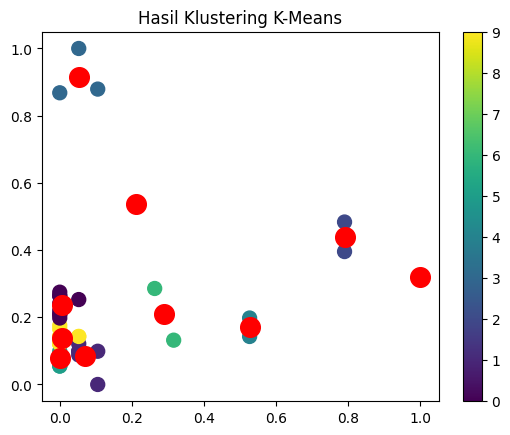

In [52]:
output = plt.scatter(feature_mtx[:,0], feature_mtx[:,1], s = 100, c = tourism_tangerang.cluster_, marker = "o", alpha = 1, )
centers = agglom.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

### Bekasi

In [54]:
bekasi_city = tourism[tourism['city']=='Bekasi']

#tourism = pd.get_dummies(jakarta_city, columns=["Category"])
tourism_bekasi = pd.get_dummies(bekasi_city, columns=["city"])

tourism_bekasi

,no,name,category,address,place_id,rating,price,open hours,latitude,longitude,time_minutes,maps,user_id,url,deskripsi,city_Bekasi
193,199,Taman Kemang Pratama,park,"Jalan Niaga Raya Blok. C No. 3, Sepanjang Jaya...",ChIJuXgHFMGNaS4RFPm-2SjFM_w,4.5,5000,24 hours,-6.269655,106.986540,53,https://www.google.com/maps/search/?api=1&quer...,199,https://firebasestorage.googleapis.com/v0/b/lo...,Taman kecil di tepi sungai dengan kedai makana...,1
194,200,Taman Kota Bekasi,park,"Jl. Veteran No.46, RT.006/RW.006, Marga Jaya, ...",ChIJhxat2yWMaS4RK-AvhhIMiog,4.5,0,24 hours,-6.240641,107.000397,50,https://www.google.com/maps/search/?api=1&quer...,200,https://firebasestorage.googleapis.com/v0/b/lo...,"Taman kota Bekasi,tamannya tepat di depan kant...",1
195,201,Situ Rawa Gede Kota Bekasi,tourist_attraction,"RT.005/RW.002, Bojong Menteng, Rawa Lumbu, Bek...",ChIJk6rAJIqNaS4RENVBRdTR8T4,4.4,10000,07.00 am - 06.30 pm,-6.294645,106.978597,60,https://www.google.com/maps/search/?api=1&quer...,201,https://firebasestorage.googleapis.com/v0/b/lo...,"Danau kecil dengan perahu dayung, spot piknik,...",1
196,202,Danau Summarecon Bekasi,tourist_attraction,"QXFW+GF9, Jl. Bulevar Bar., RT.001/RW.011, Mar...",ChIJNSjXMHuNaS4RiIrCUzZOsuU,4.7,0,24 hours,-6.226202,106.996246,51,https://www.google.com/maps/search/?api=1&quer...,202,https://firebasestorage.googleapis.com/v0/b/lo...,"Sebuah danau dimana bersantai, olahraga, nongk...",1
197,203,Tempat Wisata Danau Marrakash,tourist_attraction,"R287+VQ8, Bahagia, Babelan, Bekasi Regency, We...",ChIJuYEHNGWJaS4Rz9id_jn7DEg,4.5,5000,07.00 am - 10.00 pm,-6.182826,107.014447,61,https://www.google.com/maps/search/?api=1&quer...,203,https://firebasestorage.googleapis.com/v0/b/lo...,Taman bermain yang cocok untuk akhir pekan. di...,1
198,204,Go! Wet Waterpark Grand Wisata,tourist_attraction,"Grand Wisata Kavling I No.1, Southern Blvd, La...",ChIJQduQdtSRaS4RH_WkE8o5raE,4.4,200000,09.00 am - 05.00 pm,-6.297833,107.050853,70,https://www.google.com/maps/search/?api=1&quer...,204,https://firebasestorage.googleapis.com/v0/b/lo...,"Seluncur air, kolam ombak, dan kolam arus adal...",1
199,205,"Situ ""Rawa Binong""",tourist_attraction,"M54M+F93, Hegarmukti, Central Cikarang, Bekasi...",ChIJN_W9BZKbaS4RrTiOeRMMz4k,4.3,0,06.00 am - 08.00 pm,-6.343865,107.183412,91,https://www.google.com/maps/search/?api=1&quer...,205,https://firebasestorage.googleapis.com/v0/b/lo...,Tempat yang nyaman buat refresing di cikarang ...,1
200,206,Hutan Bamboe Kota Bekasi,park,"Margahayu, Bekasi Timur, Bekasi, West Java 171...",ChIJpQPEp9KNaS4RQXWIjJQAkFc,4.3,0,08.00 am - 04.00 pm,-6.253474,106.995504,54,https://www.google.com/maps/search/?api=1&quer...,206,https://firebasestorage.googleapis.com/v0/b/lo...,"Wisata Bekasi tersembunyi, lokasinya deket dar...",1
201,207,Curug Parigi,tourist_attraction,"RT.001/RW.006, Cikiwul, Bantar Gebang, Bekasi,...",ChIJB-RDMq6TaS4RAYFVDLA2tnI,3.8,2000,06.00 am - 05.00 pm,-6.342907,106.970123,76,https://www.google.com/maps/search/?api=1&quer...,207,https://firebasestorage.googleapis.com/v0/b/lo...,Curug ini merupakan curug buatan yang terletak...,1
202,208,Saung Ranggon,tourist_attraction,"Jl. Cikedokan, RT.002/RW.08, Cikedokan, Kec. C...",ChIJ33y6QfGQaS4RPMwASV_WcJA,4.2,0,24 hours,-6.338653,107.070968,87,https://www.google.com/maps/search/?api=1&quer...,208,https://firebasestorage.googleapis.com/v0/b/lo...,SAUNG Ranggon merupakan bangunan bersejarah di...,1


In [55]:
featureset_bekasi = tourism_bekasi[['price', 'time_minutes']]

In [56]:
from sklearn.preprocessing import MinMaxScaler
x = featureset_bekasi.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.025     , 0.2183908 ],
       [0.        , 0.18390805],
       [0.05      , 0.29885057],
       [0.        , 0.1954023 ],
       [0.025     , 0.31034483]])

In [57]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx)
print(dist_matrix)

[[0.         0.04259179 0.08425423 ... 0.16719126 0.25410635 0.02298851]
 [0.04259179 0.         0.12534666 ... 0.20933745 0.28735632 0.02751577]
 [0.08425423 0.12534666 0.         ... 0.08518358 0.17951745 0.10642625]
 ...
 [0.16719126 0.20933745 0.08518358 ... 0.         0.14388032 0.18801999]
 [0.25410635 0.28735632 0.17951745 ... 0.14388032 0.         0.27699257]
 [0.02298851 0.02751577 0.10642625 ... 0.18801999 0.27699257 0.        ]]


### using kmeans with sklear

In [58]:
agglom = KMeans(n_clusters = 10)
agglom.fit(feature_mtx)
agglom.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 3, 0, 3, 0, 5, 2, 0, 6, 2, 2, 4, 8, 3, 8, 3, 3, 0, 3, 8, 3, 7,
       1, 6, 3, 3, 9, 3, 8, 1, 0, 9, 3, 6, 8, 0, 3, 7, 4, 0, 3, 3, 3, 8,
       6, 3], dtype=int32)

In [59]:
tourism_bekasi['cluster_'] = agglom.labels_
tourism_bekasi

,no,name,category,address,place_id,rating,price,open hours,latitude,longitude,time_minutes,maps,user_id,url,deskripsi,city_Bekasi,cluster_
193,199,Taman Kemang Pratama,park,"Jalan Niaga Raya Blok. C No. 3, Sepanjang Jaya...",ChIJuXgHFMGNaS4RFPm-2SjFM_w,4.5,5000,24 hours,-6.269655,106.986540,53,https://www.google.com/maps/search/?api=1&quer...,199,https://firebasestorage.googleapis.com/v0/b/lo...,Taman kecil di tepi sungai dengan kedai makana...,1,3
194,200,Taman Kota Bekasi,park,"Jl. Veteran No.46, RT.006/RW.006, Marga Jaya, ...",ChIJhxat2yWMaS4RK-AvhhIMiog,4.5,0,24 hours,-6.240641,107.000397,50,https://www.google.com/maps/search/?api=1&quer...,200,https://firebasestorage.googleapis.com/v0/b/lo...,"Taman kota Bekasi,tamannya tepat di depan kant...",1,3
195,201,Situ Rawa Gede Kota Bekasi,tourist_attraction,"RT.005/RW.002, Bojong Menteng, Rawa Lumbu, Bek...",ChIJk6rAJIqNaS4RENVBRdTR8T4,4.4,10000,07.00 am - 06.30 pm,-6.294645,106.978597,60,https://www.google.com/maps/search/?api=1&quer...,201,https://firebasestorage.googleapis.com/v0/b/lo...,"Danau kecil dengan perahu dayung, spot piknik,...",1,0
196,202,Danau Summarecon Bekasi,tourist_attraction,"QXFW+GF9, Jl. Bulevar Bar., RT.001/RW.011, Mar...",ChIJNSjXMHuNaS4RiIrCUzZOsuU,4.7,0,24 hours,-6.226202,106.996246,51,https://www.google.com/maps/search/?api=1&quer...,202,https://firebasestorage.googleapis.com/v0/b/lo...,"Sebuah danau dimana bersantai, olahraga, nongk...",1,3
197,203,Tempat Wisata Danau Marrakash,tourist_attraction,"R287+VQ8, Bahagia, Babelan, Bekasi Regency, We...",ChIJuYEHNGWJaS4Rz9id_jn7DEg,4.5,5000,07.00 am - 10.00 pm,-6.182826,107.014447,61,https://www.google.com/maps/search/?api=1&quer...,203,https://firebasestorage.googleapis.com/v0/b/lo...,Taman bermain yang cocok untuk akhir pekan. di...,1,0
198,204,Go! Wet Waterpark Grand Wisata,tourist_attraction,"Grand Wisata Kavling I No.1, Southern Blvd, La...",ChIJQduQdtSRaS4RH_WkE8o5raE,4.4,200000,09.00 am - 05.00 pm,-6.297833,107.050853,70,https://www.google.com/maps/search/?api=1&quer...,204,https://firebasestorage.googleapis.com/v0/b/lo...,"Seluncur air, kolam ombak, dan kolam arus adal...",1,5
199,205,"Situ ""Rawa Binong""",tourist_attraction,"M54M+F93, Hegarmukti, Central Cikarang, Bekasi...",ChIJN_W9BZKbaS4RrTiOeRMMz4k,4.3,0,06.00 am - 08.00 pm,-6.343865,107.183412,91,https://www.google.com/maps/search/?api=1&quer...,205,https://firebasestorage.googleapis.com/v0/b/lo...,Tempat yang nyaman buat refresing di cikarang ...,1,2
200,206,Hutan Bamboe Kota Bekasi,park,"Margahayu, Bekasi Timur, Bekasi, West Java 171...",ChIJpQPEp9KNaS4RQXWIjJQAkFc,4.3,0,08.00 am - 04.00 pm,-6.253474,106.995504,54,https://www.google.com/maps/search/?api=1&quer...,206,https://firebasestorage.googleapis.com/v0/b/lo...,"Wisata Bekasi tersembunyi, lokasinya deket dar...",1,0
201,207,Curug Parigi,tourist_attraction,"RT.001/RW.006, Cikiwul, Bantar Gebang, Bekasi,...",ChIJB-RDMq6TaS4RAYFVDLA2tnI,3.8,2000,06.00 am - 05.00 pm,-6.342907,106.970123,76,https://www.google.com/maps/search/?api=1&quer...,207,https://firebasestorage.googleapis.com/v0/b/lo...,Curug ini merupakan curug buatan yang terletak...,1,6
202,208,Saung Ranggon,tourist_attraction,"Jl. Cikedokan, RT.002/RW.08, Cikedokan, Kec. C...",ChIJ33y6QfGQaS4RPMwASV_WcJA,4.2,0,24 hours,-6.338653,107.070968,87,https://www.google.com/maps/search/?api=1&quer...,208,https://firebasestorage.googleapis.com/v0/b/lo...,SAUNG Ranggon merupakan bangunan bersejarah di...,1,2


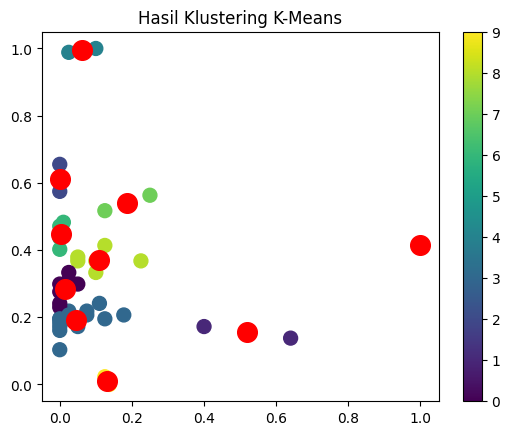

In [60]:
output = plt.scatter(feature_mtx[:,0], feature_mtx[:,1], s = 100, c = tourism_bekasi.cluster_, marker = "o", alpha = 1, )
centers = agglom.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()